In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


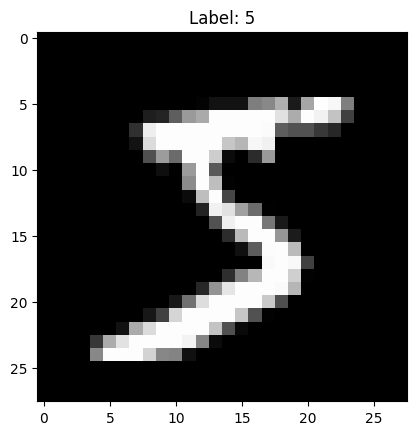

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display one image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [4]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),         # Flatten the 28x28 images into 1D array
    layers.Dense(128, activation='relu'),         # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')        # Output layer for 10 digits (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)


C:\Users\LEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8727 - loss: 0.4522 - val_accuracy: 0.9672 - val_loss: 0.1206
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9628 - loss: 0.1255 - val_accuracy: 0.9727 - val_loss: 0.0924
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9763 - loss: 0.0820 - val_accuracy: 0.9737 - val_loss: 0.0957
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9782 - val_loss: 0.0746
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9872 - loss: 0.0432 - val_accuracy: 0.9782 - val_loss: 0.0757


In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9719 - loss: 0.0916
Test Accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


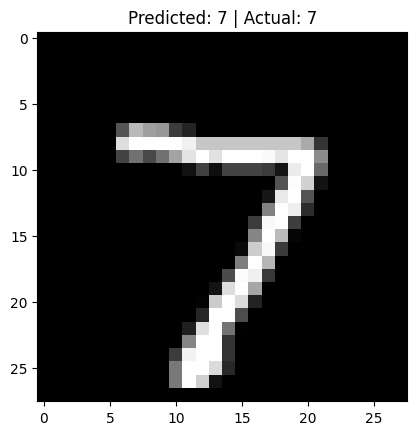

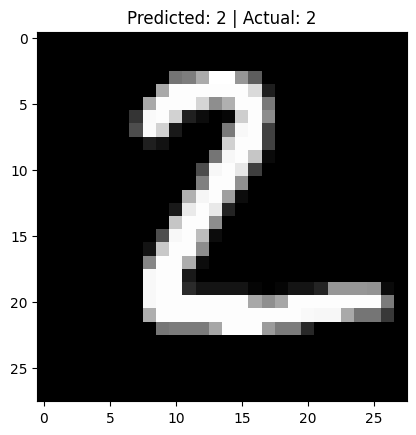

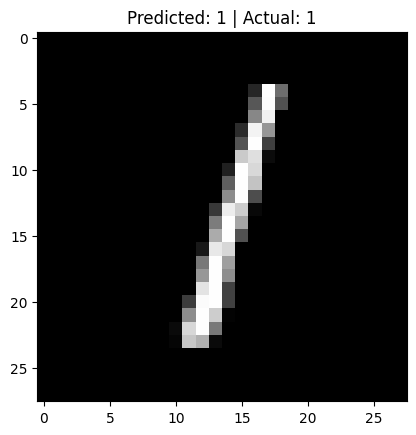

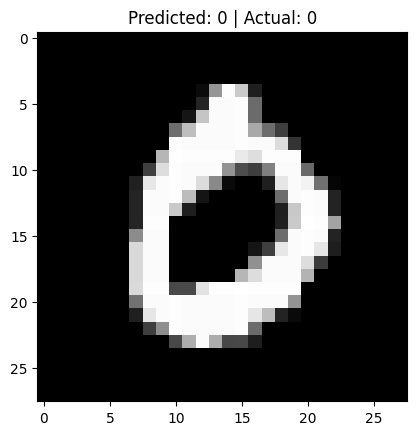

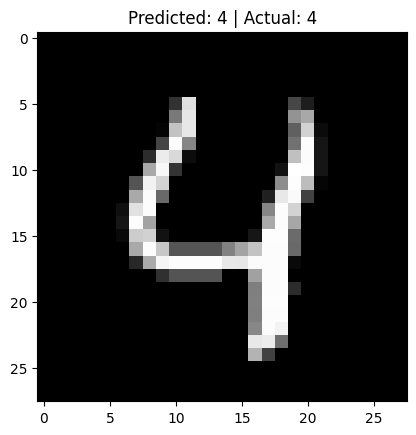

In [6]:
# Make predictions on test images
predictions = model.predict(test_images)

# Plot a few images with predictions
import numpy as np

for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {test_labels[i]}")
    plt.show()


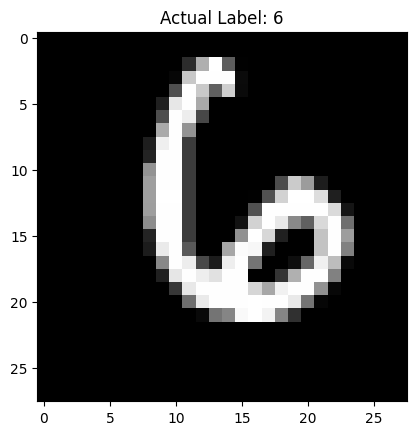

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Label: 6


In [7]:
# Example: Predict the 12th image (index 11)
index = 88  # You can change this number to anything between 0 and 9999

plt.imshow(test_images[index], cmap='gray')
plt.title(f"Actual Label: {test_labels[index]}")
plt.show()

# Predict using the trained model
prediction = model.predict(test_images[index].reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9775 - val_loss: 0.0874
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9803 - val_loss: 0.0759
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9942 - loss: 0.0206 - val_accuracy: 0.9797 - val_loss: 0.0821
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9950 - loss: 0.0182 - val_accuracy: 0.9815 - val_loss: 0.0793
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9820 - val_loss: 0.0772
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9964 - loss: 0.0125 - val_accuracy: 0.9825 - val_loss: 0.0744
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9963 - loss: 0.0122 - val_accuracy: 0.9772 - val_loss: 0.1007
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9985 - loss: 0

In [10]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [11]:
# Build a Convolutional Neural Network (CNN) model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Reshape the data to add channel dimension (needed for CNN)
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

# Train the CNN model
history_cnn = cnn_model.fit(train_images_cnn, train_labels, epochs=5, validation_split=0.1)


C:\Users\LEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8934 - loss: 0.3516 - val_accuracy: 0.9852 - val_loss: 0.0481
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9885 - val_loss: 0.0466
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9885 - val_loss: 0.0456
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9927 - loss: 0.0235 - val_accuracy: 0.9885 - val_loss: 0.0421
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9892 - val_loss: 0.0389


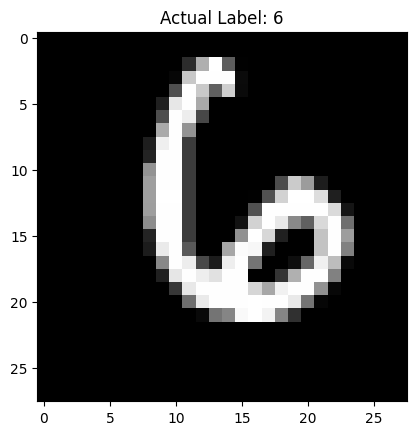

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted Label: 6


In [12]:
index = 88  # You can change this number if you want to test others

# Display the image
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Actual Label: {test_labels[index]}")
plt.show()

# Prepare the image for CNN (reshape)
image = test_images[index].reshape(1, 28, 28, 1)

# Predict using the CNN model
prediction = cnn_model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


In [13]:
history_cnn = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9963 - loss: 0.0112 - val_accuracy: 0.9905 - val_loss: 0.0436
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9908 - val_loss: 0.0346
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9898 - val_loss: 0.0475
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9913 - val_loss: 0.0530
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9897 - val_loss: 0.0571
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9980 - loss: 0.0054 - val_accuracy: 0.9888 - val_loss: 0.0552
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9981 - loss: 0.0054 - val_accuracy: 0.9900 - val_loss: 0.0563
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9988 -

In [16]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout added here
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


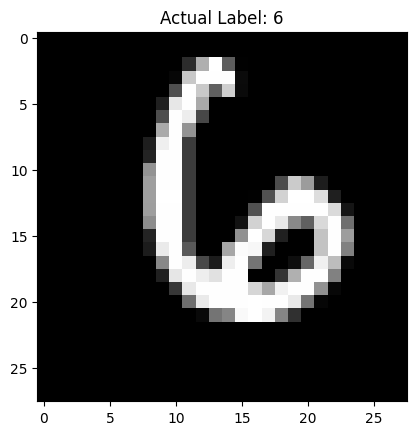

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predicted Label: 4


In [17]:
index = 88  # You can change this number if you want to test others

# Display the image
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Actual Label: {test_labels[index]}")
plt.show()

# Prepare the image for CNN (reshape)
image = test_images[index].reshape(1, 28, 28, 1)

# Predict using the CNN model
prediction = cnn_model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


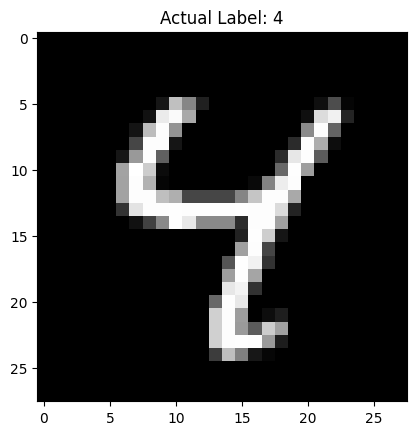

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Label: 0


In [18]:
index = 5  # You can change this number if you want to test others

# Display the image
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Actual Label: {test_labels[index]}")
plt.show()

# Prepare the image for CNN (reshape)
image = test_images[index].reshape(1, 28, 28, 1)

# Predict using the CNN model
prediction = cnn_model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


In [19]:
history_cnn = cnn_model.fit(train_images_cnn, train_labels, epochs=20, validation_split=0.1)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8816 - loss: 0.3806 - val_accuracy: 0.9845 - val_loss: 0.0517
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9811 - loss: 0.0644 - val_accuracy: 0.9873 - val_loss: 0.0443
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9859 - loss: 0.0448 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9911 - loss: 0.0259 - val_accuracy: 0.9932 - val_loss: 0.0289
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9905 - val_loss: 0.0355
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9903 - val_loss: 0.0384
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9955 -

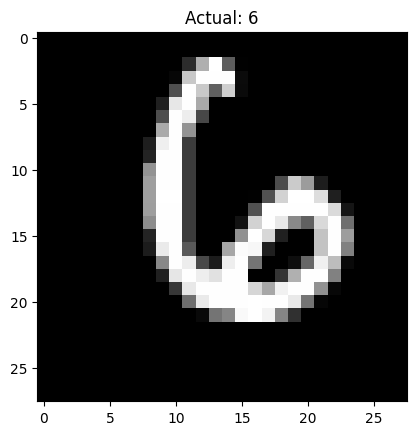

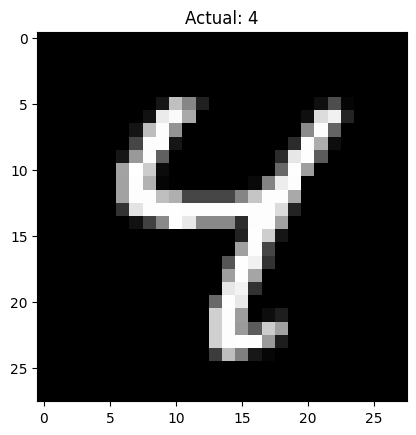

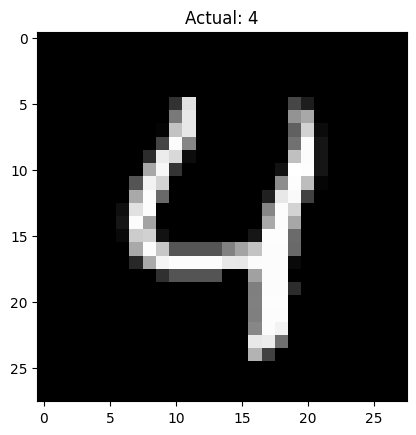

In [20]:
for i in [88, 6, 4]:
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Actual: {test_labels[i]}")
    plt.show()


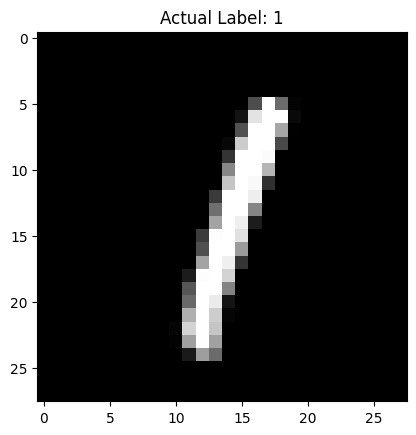

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Label: 1


In [21]:
index = 5  # You can change this number if you want to test others

# Display the image
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Actual Label: {test_labels[index]}")
plt.show()

# Prepare the image for CNN (reshape)
image = test_images[index].reshape(1, 28, 28, 1)

# Predict using the CNN model
prediction = cnn_model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")
